In [49]:
pip install iteround

Note: you may need to restart the kernel to use updated packages.


In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import matplotlib.pyplot as plt
from pycalib.visualisations import (
    plot_reliability_diagram,
    plot_binary_reliability_diagram_gaps,
    plot_multiclass_reliability_diagram_gaps)
from sklearn.preprocessing import OneHotEncoder
import iteround
import numpy as np
import pandas as pd
from scipy.stats import dirichlet

In [52]:
def get_scores(alpha, size, random_state):
    np.random.seed(random_state)
    scores = dirichlet.rvs(alpha, size)
    rounded_scores = np.array(
        [iteround.saferound(s, 1) for s in scores]
    )
    return rounded_scores

In [53]:
n_class = 10

In [54]:
scores_1 = get_scores([5, 1, 1], n_class, 42)
labels_1 = np.random.choice(3, size=(n_class, 1), p=[0.6, 0.2, 0.2])

In [55]:
scores_2 = get_scores([1, 3, 2], n_class, 43)
labels_2 = np.random.choice(3, size=(n_class, 1), p=[0.2, 0.5, 0.3])
random_instance = np.random.choice(n_class)
scores_2[random_instance] = np.around(np.ones(3) / 3, 2)
labels_2[random_instance] = 0

In [56]:
scores_3 = get_scores([1, 2, 3], n_class, 44)
labels_3 = np.random.choice(3, size=(n_class, 1), p=[0.2, 0.3, 0.5])
scores_3[random_instance] = np.around(np.ones(3) / 3, 2)
labels_3[random_instance] = 0

In [57]:
scores = np.vstack([scores_1, scores_2, scores_3])
labels = np.vstack([labels_1, labels_2, labels_3]) + 1

In [58]:
toy = pd.DataFrame(
    np.hstack([scores, labels]),
    columns=['$\hat{p}_1$', '$\hat{p}_2$', '$\hat{p}_3$', '$y$']
).astype(
    {
        '$\hat{p}_1$': float,
        '$\hat{p}_2$': float,
        '$\hat{p}_3$': float,
        '$y$': int
    }
)

In [59]:
sorted_toy = toy.sort_values(
    by=['$y$', '$\hat{p}_1$', '$\hat{p}_2$', '$\hat{p}_3$'],
    ascending=[True, False, False, False]
)

for i in range(3):
    init = 10 * i
    end = 10 * (i + 1)
    print(
        sorted_toy.iloc[init:end].set_index(
            np.arange(init + 1, end + 1)
        ).to_latex(escape=False), 
        '\hfill'
    )

\begin{tabular}{lrrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_2$ &  $\hat{p}_3$ &  $y$ \\
\midrule
1  &         1.00 &         0.00 &         0.00 &    1 \\
2  &         0.90 &         0.10 &         0.00 &    1 \\
3  &         0.80 &         0.10 &         0.10 &    1 \\
4  &         0.70 &         0.10 &         0.20 &    1 \\
5  &         0.60 &         0.30 &         0.10 &    1 \\
6  &         0.40 &         0.10 &         0.50 &    1 \\
7  &         0.33 &         0.33 &         0.33 &    1 \\
8  &         0.33 &         0.33 &         0.33 &    1 \\
9  &         0.20 &         0.40 &         0.40 &    1 \\
10 &         0.10 &         0.50 &         0.40 &    1 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{lrrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_2$ &  $\hat{p}_3$ &  $y$ \\
\midrule
11 &          0.8 &          0.2 &          0.0 &    2 \\
12 &          0.7 &          0.0 &          0.3 &    2 \\
13 &          0.5 &          0.2 &          0.3 &    2 \\
14 &          

In [60]:
for i in range(3):
    init = 10 * i
    end = 10 * (i + 1)
    temp_toy = sorted_toy.iloc[init:end].set_index(np.arange(init + 1, end + 1))
    temp_toy['$y$'] = (temp_toy['$y$'] == 1).astype(int)
    temp_toy['$\hat{p}_0$'] = temp_toy['$\hat{p}_2$'] + temp_toy['$\hat{p}_3$']
    print(
        temp_toy.to_latex(
            escape=False,
            columns=['$\hat{p}_1$', '$\hat{p}_0$', '$y$']
        ), 
        '\hfill'
    )

\begin{tabular}{lrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_0$ &  $y$ \\
\midrule
1  &         1.00 &         0.00 &    1 \\
2  &         0.90 &         0.10 &    1 \\
3  &         0.80 &         0.20 &    1 \\
4  &         0.70 &         0.30 &    1 \\
5  &         0.60 &         0.40 &    1 \\
6  &         0.40 &         0.60 &    1 \\
7  &         0.33 &         0.66 &    1 \\
8  &         0.33 &         0.66 &    1 \\
9  &         0.20 &         0.80 &    1 \\
10 &         0.10 &         0.90 &    1 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{lrrr}
\toprule
{} &  $\hat{p}_1$ &  $\hat{p}_0$ &  $y$ \\
\midrule
11 &          0.8 &          0.2 &    0 \\
12 &          0.7 &          0.3 &    0 \\
13 &          0.5 &          0.5 &    0 \\
14 &          0.4 &          0.6 &    0 \\
15 &          0.4 &          0.6 &    0 \\
16 &          0.3 &          0.7 &    0 \\
17 &          0.2 &          0.8 &    0 \\
18 &          0.1 &          0.9 &    0 \\
19 &          0.1 &       

In [61]:
def get_bins(df, pos_label, n_bins, bin_edges=None, print_table=True):
    positive_scores = df[f'$\hat{{p}}_{pos_label}$'].values
    positive_labels = (df['$y$'] == pos_label).astype(int).values

#     if bin_edges is None:
#         (counts, bin_edges) = np.histogram(
#             positive_scores, 
#             bins=n_bins,
# #             right=True
#         )

#     bin_idx = np.clip(
#         np.digitize(positive_scores, bin_edges), 
#         0, n_bins
#     )
    
    bins_scores, bins_labels = [], []

#     for b in range(n_bins):
#         bins_scores.append(sorted(positive_scores[bin_idx == b]))
#         bins_labels.append(sorted(positive_labels[bin_idx == b]))
    
    
    bin_size = 1.0/n_bins
    centers = np.linspace(bin_size/2.0, 1.0 - bin_size/2.0, n_bins)
    for i, center in enumerate(centers):
        if i == 0:
            # First bin include lower bound
            bin_indices = np.where(
                np.logical_and(
                    positive_scores >= center - bin_size/2, positive_scores <= center + bin_size/2
                )
            )
            bins_scores.append(sorted(positive_scores[bin_indices]))
            bins_labels.append(sorted(positive_labels[bin_indices]))
        else:
            bin_indices = np.where(
                np.logical_and(
                    positive_scores > center - bin_size/2, positive_scores <= center + bin_size/2
                )
            )
            bins_scores.append(sorted(positive_scores[bin_indices]))
            bins_labels.append(sorted(positive_labels[bin_indices]))
    
    bins_df = pd.DataFrame(
        {
            '$B_i$': [f'$B_{i + 1}$' for i in range(n_bins)],
            '$|B_{i}|$': [
                len(bs) for bs in bins_scores
            ],
            'scores': bins_scores,
            '$\Bar{p}(B_{i})$': [
                '{}/{}'.format(np.around(np.sum(bs), 1), len(bs)) for bs in bins_scores
            ],
            '$\Bar{p}(B_{i}2)$': [
                np.around(np.mean(bs), 2) for bs in bins_scores
            ],
            'labels': bins_labels,
            '$\Bar{y}(B_{i})$': [
                '{}/{}'.format(np.around(np.sum(bl), 1), len(bl)) for bl in bins_labels
            ],
            '$\Bar{y}(B_{i}2)$': [
                np.around(np.mean(bl), 2) for bl in bins_labels
            ]
        }
    )
    
    if print_table:
        print(
            bins_df.drop(['$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$'], axis=1).to_latex(
                escape=False, 
                index=False
            ).replace('[', '').replace(']', '').replace('0.33', '1/3').replace('scores', '').replace('labels', '')
        )
    return bins_df

In [62]:
n_bins = 5
bins_positive = get_bins(sorted_toy, 1, n_bins)

\begin{tabular}{lrllll}
\toprule
$B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                             & $\Bar{y}(B_{i})$ \\
\midrule
$B_1$ &         11 & 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.2, 0... &           1.1/11 & 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 &             2/11 \\
$B_2$ &          7 &              0.3, 0.3, 1/3, 1/3, 0.4, 0.4, 0.4 &            2.5/7 &             0, 0, 0, 0, 1, 1, 1 &              3/7 \\
$B_3$ &          3 &                                    0.5, 0.6, 0.6 &            1.7/3 &                         0, 0, 1 &              1/3 \\
$B_4$ &          7 &                0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8 &            5.4/7 &             0, 0, 0, 0, 0, 1, 1 &              2/7 \\
$B_5$ &          2 &                                         0.9, 1.0 &            1.9/2 &                            1, 1 &              2/2 \\
\bottomrule
\end{tabular}



In [63]:
print(
    bins_positive.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('{i}2', '{i}')
)

\begin{tabular}{lrrr}
\toprule
$B_i$ &  $\Bar{p}(B_{i})$ &  $\Bar{y}(B_{i})$ &  $|B_{i}|$ \\
\midrule
$B_1$ &               0.10 &               0.18 &         11 \\
$B_2$ &               0.35 &               0.43 &          7 \\
$B_3$ &               0.57 &               0.33 &          3 \\
$B_4$ &               0.77 &               0.29 &          7 \\
$B_5$ &               0.95 &               1.00 &          2 \\
\bottomrule
\end{tabular}



In [64]:
def calculate_binary_ece(bins):
    abs_diff = (bins['$\Bar{y}(B_{i}2)$'] - bins['$\Bar{p}(B_{i}2)$']).abs()
    mul = abs_diff * bins['$|B_{i}|$']
    numerator = ' + '.join(
        [
            '{} \cdot {}'.format(b, np.around(ad, 2)) for (b, ad) in zip(
                bins['$|B_{i}|$'], abs_diff
            )
        ]
    )
    
    return np.around(mul.sum() / bins['$|B_{i}|$'].sum(), 4), numerator

In [65]:
pos_ece = calculate_binary_ece(bins_positive)
print(pos_ece)

(0.1873, '11 \\cdot 0.08 + 7 \\cdot 0.08 + 3 \\cdot 0.24 + 7 \\cdot 0.48 + 2 \\cdot 0.05')


In [66]:
def get_confidence_df(df):
    conf_values = df.drop('$y$', axis=1).set_index(
        np.arange(1, 31)
    ).max(axis=1)
    
    conf_columns = df.drop('$y$', axis=1).set_index(
        np.arange(1, 31)
    ).idxmax(axis=1).values
    
    predictions = np.array([int(col[-2]) for col in conf_columns])
    correct = (df['$y$'].values == predictions).astype(int)
    
    return pd.DataFrame(
        {
            '$\hat{p}_1$': conf_values,
            '$y$': correct
        }
    )

In [67]:
conf_df = get_confidence_df(sorted_toy)

In [68]:
for i in range(3):
    init = 10 * i
    end = 10 * (i + 1)
    print(
        conf_df.iloc[init:end].set_index(
            np.arange(init + 1, end + 1)
        ).to_latex(header=['confidence', 'correct'], index=False, escape=False), 
        '\hfill'
    )

\begin{tabular}{rr}
\toprule
confidence & correct \\
\midrule
      1.00 &       1 \\
      0.90 &       1 \\
      0.80 &       1 \\
      0.70 &       1 \\
      0.60 &       1 \\
      0.50 &       0 \\
      0.33 &       1 \\
      0.33 &       1 \\
      0.40 &       0 \\
      0.50 &       0 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{rr}
\toprule
confidence & correct \\
\midrule
       0.8 &       0 \\
       0.7 &       0 \\
       0.5 &       0 \\
       0.4 &       0 \\
       0.4 &       0 \\
       0.4 &       1 \\
       0.5 &       0 \\
       0.6 &       1 \\
       0.6 &       0 \\
       0.8 &       0 \\
\bottomrule
\end{tabular}
 \hfill
\begin{tabular}{rr}
\toprule
confidence & correct \\
\midrule
       0.8 &       0 \\
       0.8 &       0 \\
       0.8 &       0 \\
       0.6 &       0 \\
       0.7 &       1 \\
       0.6 &       0 \\
       0.4 &       0 \\
       0.6 &       1 \\
       0.7 &       1 \\
       0.7 &       1 \\
\bottomrule
\end{tabular}


In [69]:
bins_conf = get_bins(
    conf_df, 1, n_bins, bin_edges=np.linspace(0, 1, 6)
)

\begin{tabular}{lrllll}
\toprule
$B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                             & $\Bar{y}(B_{i})$ \\
\midrule
$B_1$ &          0 &                                                  &            0.0/0 &                                 &            0.0/0 \\
$B_2$ &          7 &              1/3, 1/3, 0.4, 0.4, 0.4, 0.4, 0.4 &            2.7/7 &             0, 0, 0, 0, 1, 1, 1 &              3/7 \\
$B_3$ &         10 & 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6 &           5.6/10 &    0, 0, 0, 0, 0, 0, 0, 1, 1, 1 &             3/10 \\
$B_4$ &         11 & 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0... &           8.3/11 & 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 &             5/11 \\
$B_5$ &          2 &                                         0.9, 1.0 &            1.9/2 &                            1, 1 &              2/2 \\
\bottomrule
\end{tabular}



In [70]:
print(
    bins_conf.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('{i}2', '{i}').replace('NaN', '')
)

\begin{tabular}{lrrr}
\toprule
$B_i$ &  $\Bar{p}(B_{i})$ &  $\Bar{y}(B_{i})$ &  $|B_{i}|$ \\
\midrule
$B_1$ &                 &                 &          0 \\
$B_2$ &               0.38 &               0.43 &          7 \\
$B_3$ &               0.56 &               0.30 &         10 \\
$B_4$ &               0.75 &               0.45 &         11 \\
$B_5$ &               0.95 &               1.00 &          2 \\
\bottomrule
\end{tabular}



In [71]:
print(calculate_binary_ece(bins_conf))

(0.2117, '0 \\cdot nan + 7 \\cdot 0.05 + 10 \\cdot 0.26 + 11 \\cdot 0.3 + 2 \\cdot 0.05')


In [72]:
bins_class_2 = get_bins(sorted_toy, 2, n_bins)

\begin{tabular}{lrllll}
\toprule
$B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                                         & $\Bar{y}(B_{i})$ \\
\midrule
$B_1$ &         15 & 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0... &           1.5/15 & 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 &             5/15 \\
$B_2$ &         12 & 0.3, 0.3, 0.3, 0.3, 0.3, 1/3, 1/3, 0.4, 0.4,... &           4.2/12 &          0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1 &             4/12 \\
$B_3$ &          3 &                                    0.5, 0.6, 0.6 &            1.7/3 &                                     0, 0, 1 &              1/3 \\
$B_4$ &          0 &                                                  &            0.0/0 &                                             &            0.0/0 \\
$B_5$ &          0 &                                                  &            0.0/0 &                                             &            0.0/0 \\
\bottomrule
\end{tabular

In [73]:
bins_class_3 = get_bins(sorted_toy, 3, n_bins)

\begin{tabular}{lrllll}
\toprule
$B_i$ &  $|B_{i}|$ &                                              & $\Bar{p}(B_{i})$ &                             & $\Bar{y}(B_{i})$ \\
\midrule
$B_1$ &         11 & 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.2, 0... &           1.1/11 & 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1 &             4/11 \\
$B_2$ &         11 & 0.3, 0.3, 0.3, 0.3, 1/3, 1/3, 0.4, 0.4, 0.4,... &           3.9/11 & 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 &             2/11 \\
$B_3$ &          4 &                               0.5, 0.5, 0.6, 0.6 &            2.2/4 &                      0, 0, 0, 1 &              1/4 \\
$B_4$ &          4 &                               0.7, 0.7, 0.7, 0.8 &            2.9/4 &                      0, 1, 1, 1 &              3/4 \\
$B_5$ &          0 &                                                  &            0.0/0 &                                 &            0.0/0 \\
\bottomrule
\end{tabular}



In [74]:
cls2_ece = calculate_binary_ece(bins_class_2)
print(cls2_ece)

(0.147, '15 \\cdot 0.23 + 12 \\cdot 0.02 + 3 \\cdot 0.24 + 0 \\cdot nan + 0 \\cdot nan')


In [75]:
cls3_ece = calculate_binary_ece(bins_class_3)
print(cls3_ece)

(0.2017, '11 \\cdot 0.26 + 11 \\cdot 0.17 + 4 \\cdot 0.3 + 4 \\cdot 0.03 + 0 \\cdot nan')


In [76]:
np.mean([pos_ece[0], cls2_ece[0], cls3_ece[0]])

0.17866666666666667

In [77]:
print(
    bins_class_2.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('_i', '_{i,2}').replace('{i}2', '{i,2}')
)

\begin{tabular}{lrrr}
\toprule
$B_{i,2}$ &  $\Bar{p}(B_{i,2})$ &  $\Bar{y}(B_{i,2})$ &  $|B_{i}|$ \\
\midrule
$B_1$ &               0.10 &               0.33 &         15 \\
$B_2$ &               0.35 &               0.33 &         12 \\
$B_3$ &               0.57 &               0.33 &          3 \\
$B_4$ &                NaN &                NaN &          0 \\
$B_5$ &                NaN &                NaN &          0 \\
\bottomrule
\end{tabular}



In [78]:
print(
    bins_class_3.to_latex(
        columns=['$B_i$', '$\Bar{p}(B_{i}2)$', '$\Bar{y}(B_{i}2)$', '$|B_{i}|$'],
        escape=False, 
        index=False
    ).replace('_i', '_{i,3}').replace('{i}2', '{i,3}')
)

\begin{tabular}{lrrr}
\toprule
$B_{i,3}$ &  $\Bar{p}(B_{i,3})$ &  $\Bar{y}(B_{i,3})$ &  $|B_{i}|$ \\
\midrule
$B_1$ &               0.10 &               0.36 &         11 \\
$B_2$ &               0.35 &               0.18 &         11 \\
$B_3$ &               0.55 &               0.25 &          4 \\
$B_4$ &               0.72 &               0.75 &          4 \\
$B_5$ &                NaN &                NaN &          0 \\
\bottomrule
\end{tabular}



In [79]:
ohl = OneHotEncoder(sparse=False).fit_transform(labels)

ohl

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

# Old version

We should stop using the following function.

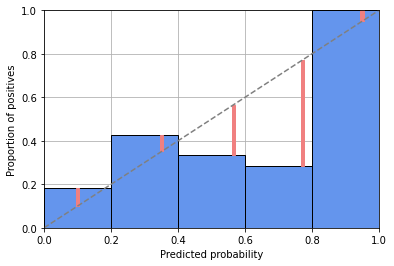

In [80]:
fig = plot_binary_reliability_diagram_gaps(ohl[:,0], scores[:,0], n_bins=5)
plt.savefig('binary-reliability-v1.pdf')

# New reliability diagram

The last version for both bar plot and lineplot should be **plot_reliability_diagram** with the desired parameters.

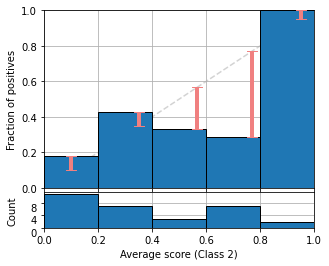

In [81]:
bin_scores = np.vstack([1 - scores[:, 0], scores[:, 0]]).T
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(ohl[:,0], bin_scores, bins=5, show_bars=True, show_gaps=True, fig=fig)
plt.savefig('binary-reliability-v2.pdf')

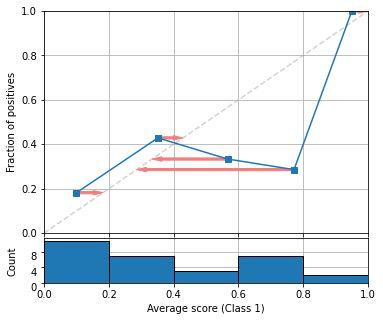

In [82]:
fig = plt.figure(figsize=(6, 5))
fig = plot_reliability_diagram(ohl[:,0], [np.vstack([1 - scores[:,0], scores[:,0]]).T,],
                               class_names=['not 1', '1'], bins=5, fig=fig,
                               show_correction=True)
# plt.savefig('binary-reliability.png')

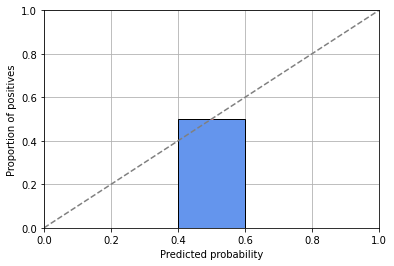

In [83]:
fig2 = plot_binary_reliability_diagram_gaps(
    np.array([1]*5 + [0]*5),
    np.array([0.5]*10),      
    n_bins=5
)
# plt.savefig('perfect-reliability.png')

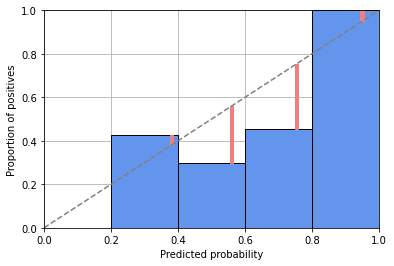

In [84]:
fig3 = plot_binary_reliability_diagram_gaps(conf_df.values[:,1], conf_df.values[:,0], n_bins=5)
# plt.savefig('confidence-reliability.png')

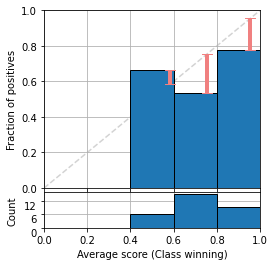

In [85]:
fig3 = plot_reliability_diagram(ohl[:,0], [np.vstack([1 - scores[:,0], scores[:,0]]).T,], bins=5,
                                confidence=True, show_bars=True, show_gaps=True)
plt.savefig('confidence-reliability-v2.pdf')

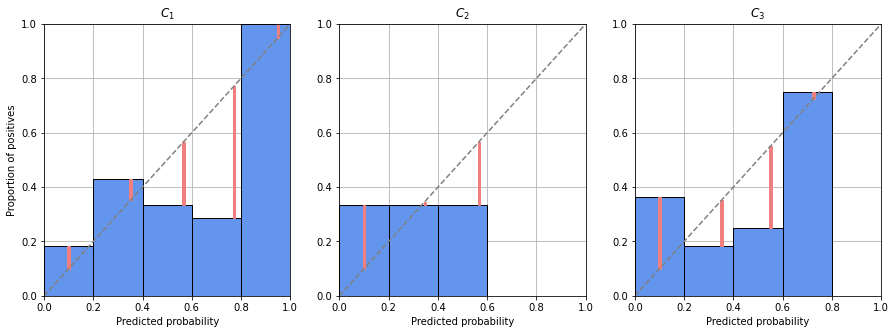

In [86]:
fig4 = plt.figure(figsize=(15,5))
fi4 = plot_multiclass_reliability_diagram_gaps(
    ohl, 
    scores, 
    n_bins=5,
    fig=fig4
)
# plt.savefig('classwise-reliability.png')

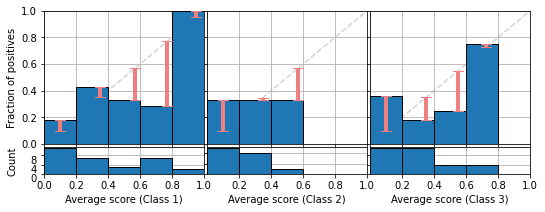

In [89]:
fig = plt.figure(figsize=(9,3))
fig = plot_reliability_diagram(labels, [scores, ], bins=5,
                               show_bars=True, show_gaps=True,
                              fig=fig)
fig.savefig('classwise-reliability-v2.pdf', bbox_inches='tight')

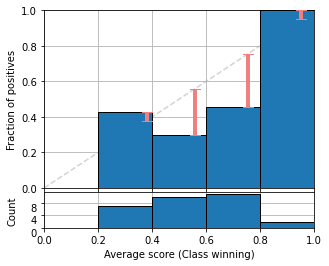

In [40]:
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(labels, [scores, ], bins=5,
                               show_bars=True, show_gaps=True,
                              fig=fig,
                               confidence=True)
fig.savefig('confidence-reliability-v2.pdf')

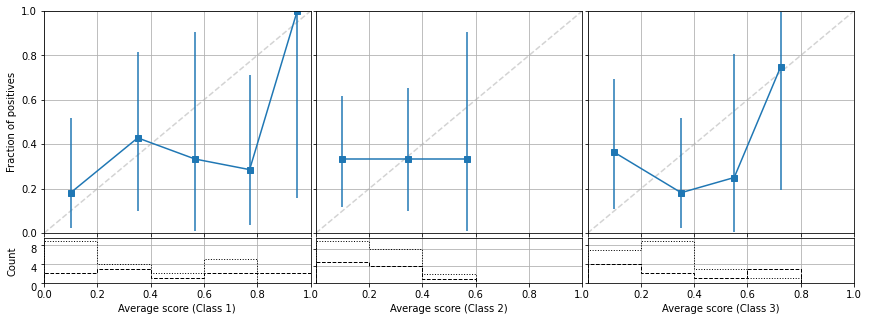

In [41]:
fig = plt.figure(figsize=(15,5))
fig = plot_reliability_diagram(labels, [scores, ], bins=5,
                               hist_per_class=True,
                               show_correction=False,
                               errorbar_interval=0.95,
                              fig=fig)

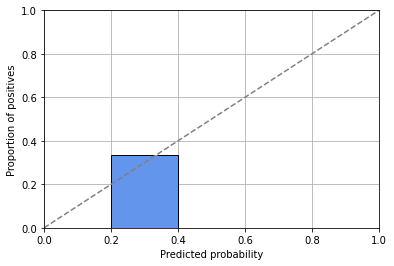

In [42]:
fig2 = plot_binary_reliability_diagram_gaps(
    np.array([1] * 10 + [0] * 20),
    np.array([1/3] * 30),      
    n_bins=5
)

In [43]:
from sklearn.metrics import log_loss


equal_scores = np.array([1/3] * 30)

print(
    log_loss(
        np.array([1] * 10 + [0] * 20),
        equal_scores
    )
)

0.6365141682948127


In [44]:
log_loss(
    np.array([1] * 10 + [0] * 20),
    np.array([0.9] * 10 + [0.1] * 20)
)

0.1053605156578263

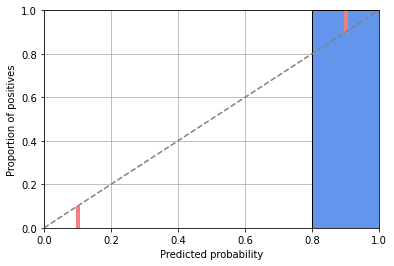

In [45]:
labels = np.array([1] * 10 + [0] * 20)
scores = np.array([0.9] * 10 + [0.1] * 20)
fig3 = plot_binary_reliability_diagram_gaps(
    labels, scores,      
    n_bins=5
)

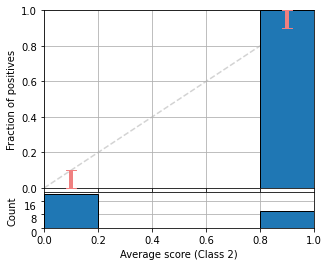

In [46]:
bin_scores = np.vstack([1 - scores, scores]).T
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(labels, bin_scores, bins=5, show_bars=True, show_gaps=True, fig=fig)
plt.savefig('reliability-0.9-v2.pdf')

# Hypothesis test

In [47]:
np.random.seed(42)
S = 1000

values = np.zeros(S)

for s in range(S):
    lab = np.zeros(len(scores))
    for i, score_vec in enumerate(scores):
        if np.sum(score_vec) == 1 :
            lab[i] = np.random.choice(3, p=score_vec) 
        else:
            lab[i] = np.random.choice(3) 
    
    sample = pd.DataFrame(
            np.hstack([scores, lab.reshape(-1, 1)]),
            columns=['$\hat{p}_1$', '$\hat{p}_2$', '$\hat{p}_3$', '$y$']
        ).astype(
            {
                '$\hat{p}_1$': float,
                '$\hat{p}_2$': float,
                '$\hat{p}_3$': float,
                '$y$': int
            }
        )
    bins_1 = get_bins(sample, 1, n_bins, print_table=False)
    ece_1, _ = calculate_binary_ece(bins_1)
    bins_2 = get_bins(sample, 2, n_bins, print_table=False)
    ece_2, _ = calculate_binary_ece(bins_2)
    bins_3 = get_bins(sample, 3, n_bins, print_table=False)
    ece_3, _ = calculate_binary_ece(bins_3)
    
    values[s] = np.mean([ece_1, ece_2, ece_3])
    

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
plt.hist(values, bins=50, density=True)

In [ ]:
plt.hist(values, bins=50, density=True)
plt.scatter([0.32], [0], c='r')

In [ ]:
cal_ece = 0.32
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([cal_ece])], [0], c='r')

for i in np.where(boundaries > cal_ece)[0][:-1]:
    patches[i].set_color('r')

print(np.sum(counts[np.where(boundaries > cal_ece)[0][:-1]])/sum(counts))

In [ ]:
plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([pos_ece[0], cls2_ece[0], cls3_ece[0]])], [0], c='r')

In [ ]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True, color='r')
plt.scatter([np.mean([pos_ece[0], cls2_ece[0], cls3_ece[0]])], [0], c='r')

In [ ]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)

In [ ]:
uncal_ece = 0.37

(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([uncal_ece])], [0], c='r')

In [ ]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([np.mean([uncal_ece])], [0], c='r')

for i in np.where(boundaries > uncal_ece)[0][:-1]:
    patches[i].set_color('r')

print(np.sum(counts[np.where(boundaries > uncal_ece)[0][:-1]])/sum(counts))

In [ ]:
S = 1000

values = np.zeros(S)
for s in range(S):
    lab = np.zeros(len(scores))
    for i, score_vec in enumerate(scores):
        if np.sum(score_vec) == 1 :
            lab[i] = np.random.choice(3, p=score_vec) 
        else:
            lab[i] = np.random.choice(3) 
   
    values[s] = log_loss(lab, scores, labels=[0, 1, 2])
    

In [ ]:
plt.hist(values, bins=50, density=True)

In [ ]:
scores

In [ ]:
ll = log_loss(labels.flatten() - 1, scores, labels=[0, 1, 2])

In [ ]:
(counts, boundaries, patches) = plt.hist(values, bins=50, density=True)
plt.scatter([ll], [0], c='r')

for i in np.where(boundaries > ll)[0][:-1]:
    patches[i].set_color('r')

print(np.sum(counts[np.where(boundaries > ll)[0][:-1]])/sum(counts))